Første steget importere alle nødvendige libraries
Viktigaste for detnne fasen er 
h5py for å åpne h5py filene, numpy for å transformere data til array
og matplotlib for å plotte data til en bilde

In [1]:
import sys
import fastai
from pathlib import Path

Sette opp path 2 parent bak so vi kan hente metoder fra dataloader og plotcreator filene

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

Legge til filene i variabelen fra deres respektive filene

In [3]:
data_path0 = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

Lage array fra data ved å utnytte metoden laget i dataloader

In [4]:
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

In [5]:
from fastai.vision.all import *


Lage datablocks frå data ved bruk av bidler som blokker og label som category returnerer datablock for videre bruk i vår vision learning metoden

In [6]:
def wrapper(image, lable):
    def pass_index(idx):
        return idx

    def get_x(i):
        return image[i]
    
    def get_y(i):
        return lable[i]

    db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items = pass_index, 
        get_x = get_x, 
        get_y = get_y
    )

    num_images = image.shape[0]
    
    dls = db.dataloaders(list(range(num_images)),bs=64)
    

    return dls

In [7]:
#images
img = np.concatenate((bhArray, sphArray))

bhOnes = np.ones(len(bhArray))
sphZeros = np.zeros(len(sphArray))

#labels
label = np.concatenate((bhOnes, sphZeros))
imgNew = ((img - np.min(img)/(np.max(img)-np.min(img)))*255).astype(np.uint8)
dls = wrapper(imgNew, label)

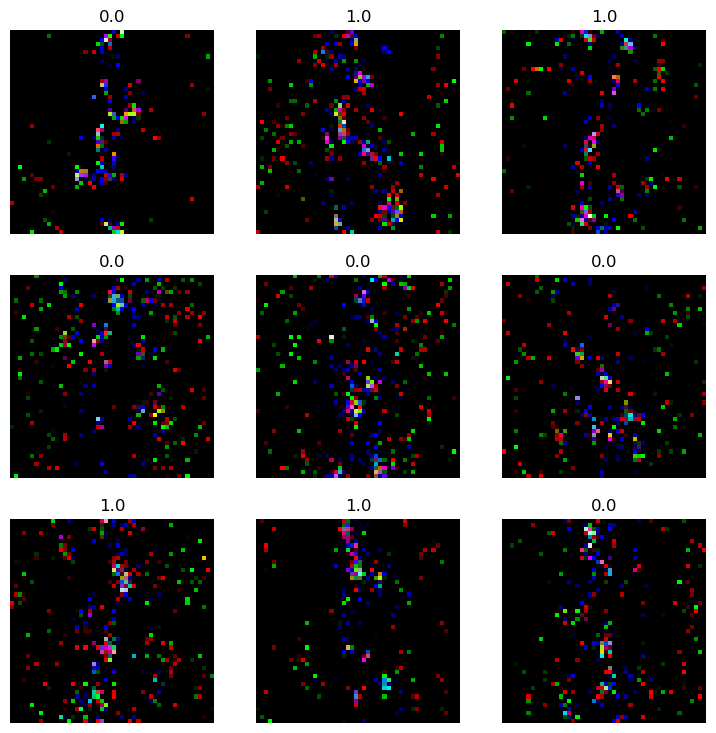

In [8]:
dls.show_batch(cmap='gray')

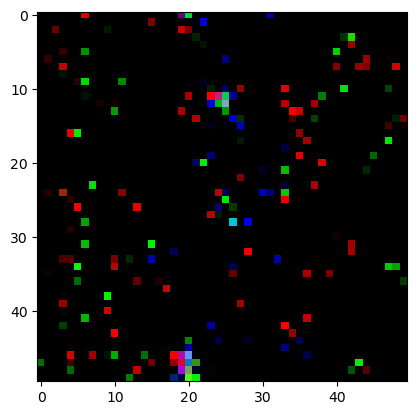

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


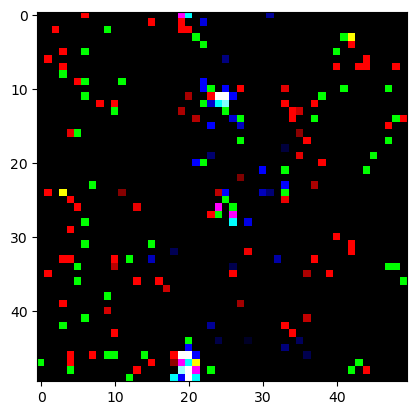

In [9]:
standardPlot(imgNew[1])
standardPlot(img[1])

Trene modellen vår

In [10]:
# Create your learner object
learner = vision_learner(dls, resnet18, metrics=accuracy)
learner.fine_tune(3)
# Train your model on GPU
# device = torch.device('cuda:0')
# learner.model.to(device)


c:\Users\vlads\anaconda3\envs\DAT255\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vlads\anaconda3\envs\DAT255\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time


In [11]:
learner.show_results

<bound method Learner.show_results of <fastai.learner.Learner object at 0x0000025CE70A46A0>>